Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [5]:
news_dataset.shape

(20800, 5)

In [6]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\CW\AppData\Local\Temp\ipykernel_7488\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


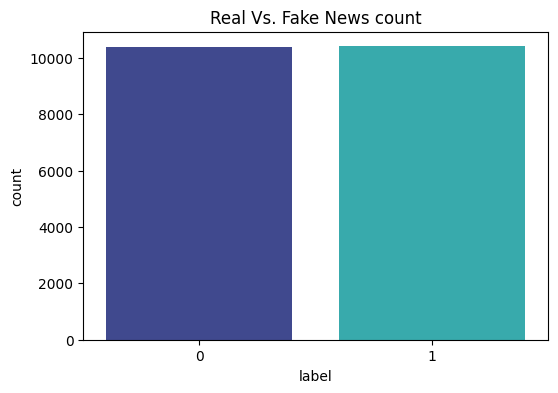

In [7]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [8]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [10]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [11]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [12]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [13]:
print(X)
print(Y)

          id                                              title  \
20448  20448  Asteroid Warning System Found ‘City-Killer’ Ob...   
10172  10172  #NoDAPL: Angry Man Fires 7 Shots Into Air Near...   
11619  11619  A New Era of Internet Attacks Powered by Every...   
4908    4908  Jesse Watters: Under Armour Should ’Rip Up’ St...   
3531    3531  Studies Examine Racial Bias in Pollution, Deva...   
...      ...                                                ...   
14608  14608  Ted Cruz: Trump’s Cabinet Conservative ’All St...   
11441  11441  House Republicans Unveil Bullet Points for Oba...   
3598    3598  BLM Activist & Daughter of 'Can't Breathe' Vic...   
9403    9403  3 Remedies From Medieval Europe To Heal The Co...   
20300  20300  Kenya’s Collective ‘Uh-Oh’: Another Election I...   

                                    author  \
20448                          Alex Ansary   
10172              Truth Broadcast Network   
11619  David E. Sanger and Nicole Perlroth   
4908       

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [17]:
print(news_dataset['content'])

20448    alex ansari asteroid warn system found citi ki...
10172    truth broadcast network nodapl angri man fire ...
11619    david e sanger nicol perlroth new era internet...
4908     trent baker jess watter armour rip steph curri...
3531     henri wolff studi examin racial bia pollut dev...
                               ...                        
14608    joel b pollak ted cruz trump cabinet conserv s...
11441    sean moran hous republican unveil bullet point...
3598     virginia kruta blm activist daughter breath vi...
9403       chri black remedi mediev europ heal common cold
20300    jeffrey gettleman kenya collect uh oh anoth el...
Name: content, Length: 500, dtype: object


In [18]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [19]:
print(X)

['alex ansari asteroid warn system found citi killer object head toward earth'
 'truth broadcast network nodapl angri man fire shot air near stand rock water protector'
 'david e sanger nicol perlroth new era internet attack power everyday devic new york time'
 'trent baker jess watter armour rip steph curri contract critic compani trump support breitbart'
 'henri wolff studi examin racial bia pollut devalu black commun'
 'activist post voter arkansa north dakota legal medic marijuana despit feder prohibit'
 'robert j marlow nba coach gregg popovich still trigger trump win breitbart'
 'angel nyc shot reportedli fire arrest dakota access pipelin protest'
 'joel b pollak california may allow communist work openli state govern breitbart'
 'penni starr ny time haberman report bannon neuter fake news'
 'steve sailer nyt talent report scrambl match stori intern often call narr unz review'
 'last day john kirbi hapless state rep get own throw towel video russia news'
 'mike mcphate california

In [20]:
print(Y)

[1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 0 1 1 0 0 1 1 0 0 

In [21]:
Y.shape

(500,)

In [22]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [23]:
print(X)

  (0, 60)	0.2917408977621271
  (0, 98)	0.3110757905844469
  (0, 143)	0.2917408977621271
  (0, 412)	0.24496935539079506
  (0, 683)	0.3110757905844469
  (0, 851)	0.2673818136167773
  (0, 1007)	0.3110757905844469
  (0, 1233)	0.3110757905844469
  (0, 1577)	0.2917408977621271
  (0, 2202)	0.27802257298762095
  (0, 2289)	0.27802257298762095
  (0, 2412)	0.2673818136167773
  (1, 49)	0.27602890730093377
  (1, 90)	0.27602890730093377
  (1, 287)	0.2943225006211173
  (1, 819)	0.24475580296068838
  (1, 1360)	0.22170860103915765
  (1, 1524)	0.27602890730093377
  (1, 1534)	0.2943225006211173
  (1, 1551)	0.2943225006211173
  (1, 1781)	0.27602890730093377
  (1, 1915)	0.2630493962808719
  (1, 2032)	0.2630493962808719
  (1, 2122)	0.24475580296068838
  (1, 2316)	0.252981705379403
  :	:
  (497, 1037)	0.18530621497135444
  (497, 1258)	0.3168304027114803
  (497, 1828)	0.2971378323968003
  (497, 2375)	0.3168304027114803
  (497, 2386)	0.2723281279033904
  (498, 221)	0.3105922395987932
  (498, 396)	0.35027744174

Splitting the dataset to training & test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


Training the Model: Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [27]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.99


In [29]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.92


Making a Predictive System

In [31]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [32]:
res = Y_test[3]

if (res == 0):
    print('The news is Real - 0')
else:
    print('The news is Fake - 1')

The news is Fake - 1


WITHOUT PYTHON PACKAGE IMPLEMENTATION

In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#print(X1_train)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class logistic_regression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Convert probabilities to binary predictions
        binary_predictions = (y_pred >= 0.5).astype(int)
        return binary_predictions

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

log_r = logistic_regression(lr=0.01)
log_r.fit(X1_train,y1_train)
y_pred = log_r.predict(X1_test)
print(y_pred)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y1_test)
print(acc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.5


In [38]:
X1_new = X1_test[23]

prediction = log_r.predict(X1_new)
print(prediction)

1


MANUAL TESTING

In [48]:
def manual_logistic_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    
    # Make the prediction
    prediction = log_r.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_logistic_prediction()

The news is Fake [1]
